### import librerie

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### first look

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

### model splitting, creation, training and evaluation

In [13]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [16]:
# model creation
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# model training
model.fit(X_train, y_train)

# prediction
predictions = model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 0.26275762775016454
R2 Score: 0.7994842586450439


### plotting

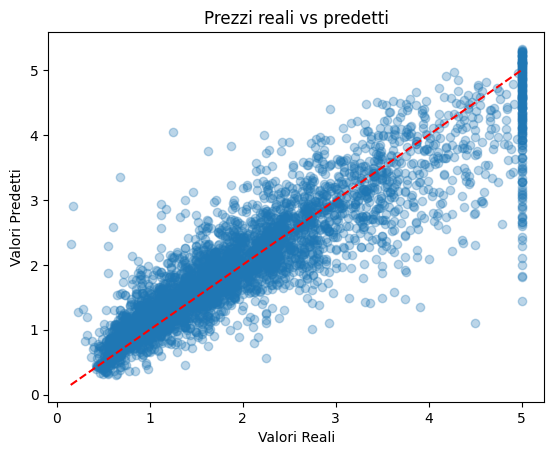

In [ ]:
plt.scatter(y_test, predictions, alpha=0.3)
plt.xlabel("Real values")
plt.ylabel("Forecast values")
plt.title("Prices real vs forecast")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # linea perfetta
plt.show()